In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import scipy.misc
import skimage.transform
plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams.update({'font.size': 18})

C:\Users\PC\AppData\Local\Temp\ipykernel_170420\1929567958.py:3: DeprecationWarning: scipy.misc is deprecated and will be removed in 2.0.0
  import scipy.misc


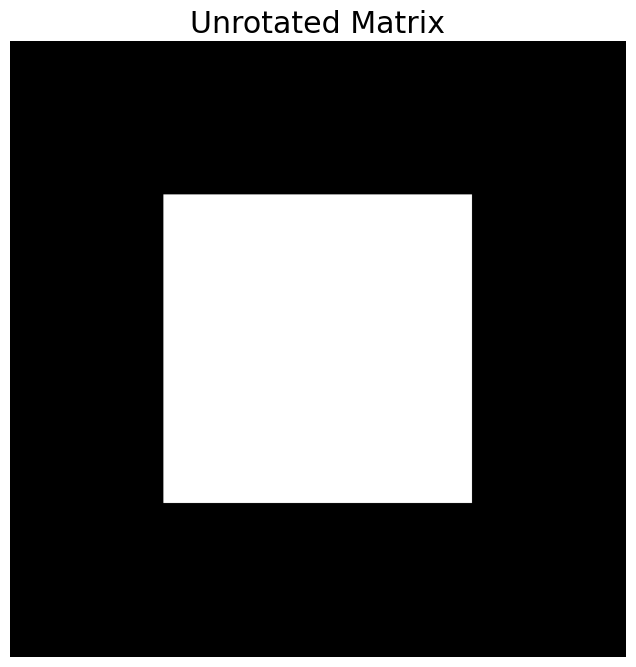

In [3]:
n = 1000
q = int(n/4)
X = np.zeros((n,n))
X[(q-1):(3*q), (q-1):(3*q)] = 1

plt.imshow(X)
plt.set_cmap('gray')
plt.axis('off')
plt.title('Unrotated Matrix')
plt.show()

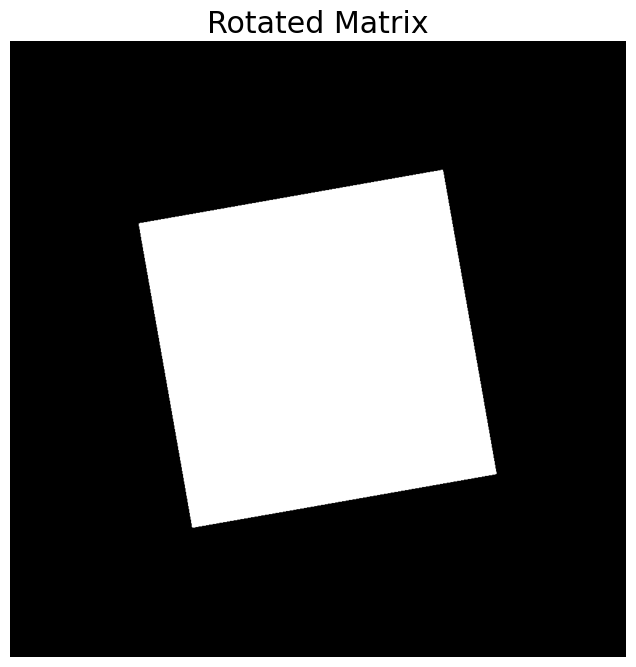

In [5]:
X_rot = skimage.transform.rotate(X, 10)
X_rot[np.nonzero(X_rot)] = 1 

plt.imshow(X_rot)
plt.set_cmap('gray')
plt.axis('off')
plt.title('Rotated Matrix')
plt.show()

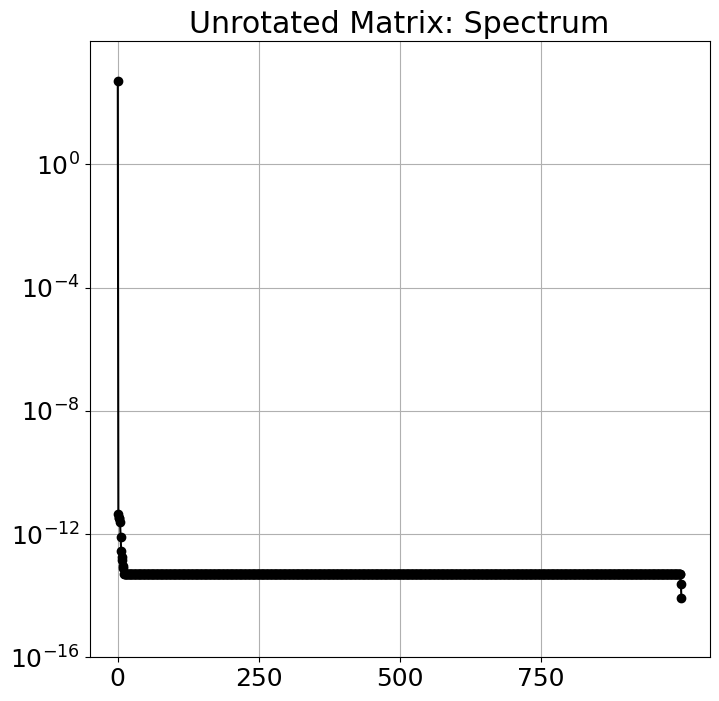

In [6]:
U, S, VT = np.linalg.svd(X, full_matrices=0)

plt.semilogy(S, '-o', color='k')
plt.ylim((10**(-16), 10**(4)+1))
plt.yticks(np.power(10, np.arange(-16,4,4, dtype=float)))
plt.xticks(np.arange(0,1000, 250))
plt.grid()
plt.title('Unrotated Matrix: Spectrum')
plt.show()

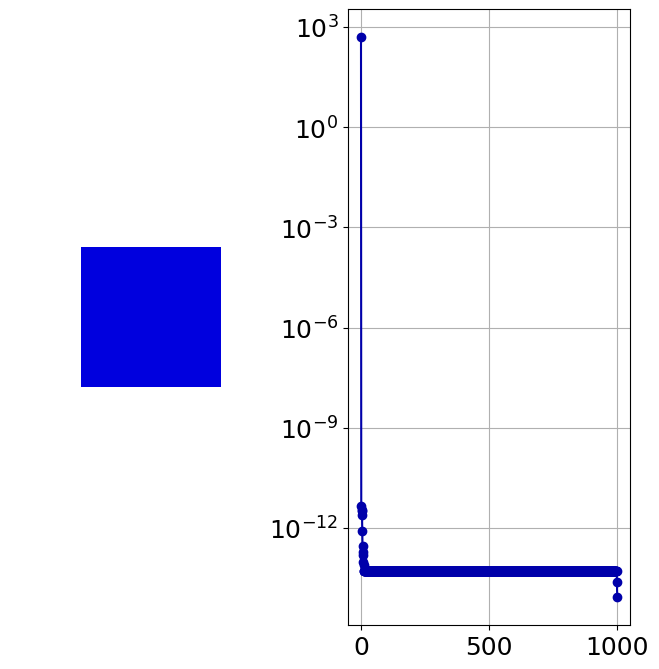

In [8]:
n = 1000
q = int(n/4)
X = np.zeros((n,n))
X[(q-1):(3*q), (q-1):(3*q)] = 1

nAngles = 12
cm_np = np.array([[0,0,2/3],
                  [0,0,1],
                  [0,1/3,1],
                  [0,2/3,1],
                  [0,1,1],
                  [1/3, 1, 2/3],
                  [2/3, 1, 1/3],
                  [1,1,0],
                  [1, 2/3, 0],
                  [1, 1/3, 0],
                  [1,0,0],
                  [2/3, 0, 0]])
cmap = plt.cm.jet
cmap.set_bad(alpha= 0)

U,S, VT = np.linalg.svd(X, full_matrices=0)
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
plt.imshow(np.ma.masked_where(X == 0, X), vmin=0, vmax=nAngles)
plt.set_cmap(cmap)
plt.axis('off')

ax2 = fig1.add_subplot(122)
plt.semilogy(S, '-o', color=tuple(cm_np[0]))
plt.grid()
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_170420\2589392419.py:16: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[1].axis('on')


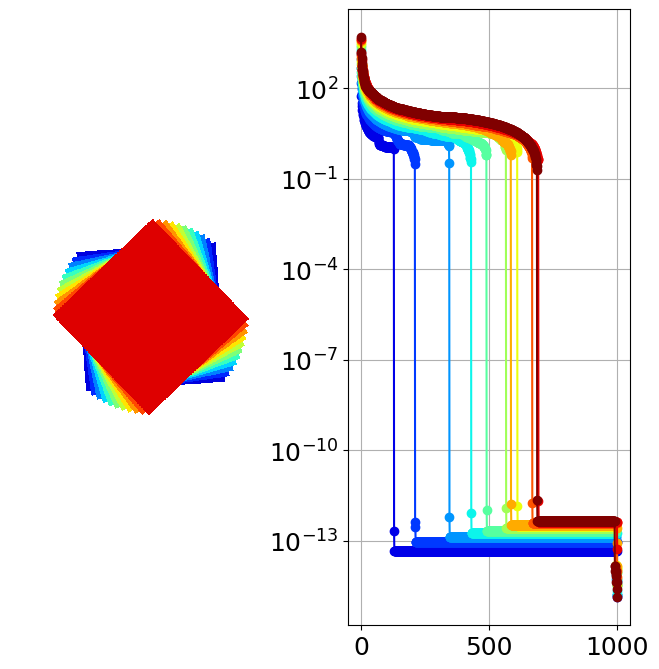

In [12]:
xrot = X 

fig, axs = plt.subplots(1,2)

for j in range(nAngles):
    xrot = skimage.transform.rotate(X, j * 4, resize=False)
    xrot[np.nonzero(xrot)] = j
    
    U, S, VT = np.linalg.svd(xrot)
    axs[0].imshow(np.ma.masked_where(xrot == 0, xrot), vmin=0, vmax=nAngles, cmap='jet')
    axs[0].axis('off')
    
    # Get color from colormap
    color = cmap(j / max(nAngles-1, 1))[:3]
    axs[1].semilogy(S, '-o', color=color)
    axs[1].axis('on')
    axs[1].grid(True)
    
plt.show()
    
    